In [2]:
# Imported Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN

# Other Libraries
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [3]:
scaled_train_df = pd.read_csv('../Resources/scaled_train_data.csv')


In [4]:
scaled_train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.788346,-1.623936
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269786,-1.623936
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.996638,-1.623910
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.422468,-1.623910
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.672923,-1.623883


In [5]:
# Get the number of rows for the class
class_distribution = scaled_train_df['Class'].value_counts()
class_percentages = scaled_train_df['Class'].value_counts(normalize=True) * 100

# Combine into a DataFrame for a clearer display
class_summary = pd.DataFrame({'Count': class_distribution, 'Percentage': class_percentages})

# Format the Count and Percentage columns
class_summary['Count'] = class_summary['Count'].apply(lambda x: f"{x:,.3f}")
class_summary['Percentage'] = class_summary['Percentage'].apply(lambda x: f"{x:,.3f}   %")

print(class_summary)

             Count  Percentage
Class                         
0      171,730.000  99.791   %
1          360.000   0.209   %


In [6]:
# Assuming scaled_train_df is already defined
X = scaled_train_df.drop('Class', axis=1)
y = scaled_train_df['Class']

# Define SMOTE and RandomUnderSampler
smote = SMOTE(sampling_strategy='minority')
under_sampler = RandomUnderSampler(sampling_strategy='majority')

# Create a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('under', under_sampler)])

# Apply the pipeline to the data
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Combine resampled data into a DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled

# Display the new class distribution
class_distribution = resampled_df['Class'].value_counts()
class_percentages = resampled_df['Class'].value_counts(normalize=True) * 100

# Combine into a DataFrame for a clearer display
class_summary = pd.DataFrame({'Count': class_distribution, 'Percentage': class_percentages})

# Format the Count and Percentage columns
class_summary['Count'] = class_summary['Count'].apply(lambda x: f"{x:,.3f}")
class_summary['Percentage'] = class_summary['Percentage'].apply(lambda x: f"{x:,.3f}   %")

print(class_summary)

             Count  Percentage
Class                         
0      171,730.000  50.000   %
1      171,730.000  50.000   %


In [7]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Train and evaluate the Logistic Regression and the SVM models
## with the Over-Sampling and Under-Sampling:

In [9]:
# Logistic Regression
logistic_regression = LogisticRegression()

# Pipelines for over-sampling
over_pipeline_lr = Pipeline(steps=[('smote', smote), ('logistic', logistic_regression)])

# Pipelines for under-sampling
under_pipeline_lr = Pipeline(steps=[('under', under_sampler), ('logistic', logistic_regression)])

# Train and evaluate Logistic Regression with over-sampling
over_pipeline_lr.fit(X_train, y_train)
y_pred_over_lr = over_pipeline_lr.predict(X_val)
print("Logistic Regression with Over-Sampling:\n", classification_report(y_val, y_pred_over_lr))

# Train and evaluate Logistic Regression with under-sampling
under_pipeline_lr.fit(X_train, y_train)
y_pred_under_lr = under_pipeline_lr.predict(X_val)
print("Logistic Regression with Under-Sampling:\n", classification_report(y_val, y_pred_under_lr))


Logistic Regression with Over-Sampling:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     34352
           1       0.08      0.89      0.14        66

    accuracy                           0.98     34418
   macro avg       0.54      0.94      0.57     34418
weighted avg       1.00      0.98      0.99     34418

Logistic Regression with Under-Sampling:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     34352
           1       0.05      0.91      0.10        66

    accuracy                           0.97     34418
   macro avg       0.53      0.94      0.54     34418
weighted avg       1.00      0.97      0.98     34418



## XGBoost Model with the SMOTEENN

In [11]:

# Assuming scaled_train_df is already defined
X = scaled_train_df.drop('Class', axis=1)
y = scaled_train_df['Class']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN to balance the dataset
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
report_xgb = classification_report(y_val, y_pred_xgb)

print(f'Accuracy: {accuracy_xgb}')
print(f'Classification Report:\n{report_xgb}')

Accuracy: 0.9987797082921727
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34352
           1       0.64      0.85      0.73        66

    accuracy                           1.00     34418
   macro avg       0.82      0.92      0.86     34418
weighted avg       1.00      1.00      1.00     34418



## XGBoost model achieved a high level of accuracy and a significant improvement in precision for fraud detection.


- **Overall Accuracy: 0.9988**
- **Precision for Fraud (Class 1): 0.64**
- **Recall for Fraud (Class 1): 0.85**

With these metrics, the XGBoost model accurately and effectively catches fraud cases without as many false alarms.


In [13]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'scale_pos_weight': [1, 10, 25],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Evaluate the best model
y_pred_best_xgb = best_xgb_model.predict(X_val)
accuracy_best_xgb = accuracy_score(y_val, y_pred_best_xgb)
report_best_xgb = classification_report(y_val, y_pred_best_xgb)

print(f'Accuracy: {accuracy_best_xgb}')
print(f'Classification Report:\n{report_best_xgb}')


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 0.7}
Accuracy: 0.9993026904526701
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34352
           1       0.80      0.85      0.82        66

    accuracy                           1.00     34418
   macro avg       0.90      0.92      0.91     34418
weighted avg       1.00      1.00      1.00     34418



Feature: V1, Importance: 0.00722165172919631
Feature: V2, Importance: 0.006295321974903345
Feature: V3, Importance: 0.017332764342427254
Feature: V4, Importance: 0.04233844578266144
Feature: V5, Importance: 0.01314390730112791
Feature: V6, Importance: 0.0017116775270551443
Feature: V7, Importance: 0.011552827432751656
Feature: V8, Importance: 0.02468709647655487
Feature: V9, Importance: 0.009414528496563435
Feature: V10, Importance: 0.023424964398145676
Feature: V11, Importance: 0.010919311083853245
Feature: V12, Importance: 0.04209097474813461
Feature: V13, Importance: 0.00797739066183567
Feature: V14, Importance: 0.6439289450645447
Feature: V15, Importance: 0.004135318100452423
Feature: V16, Importance: 0.002796565182507038
Feature: V17, Importance: 0.010846182703971863
Feature: V18, Importance: 0.012787590734660625
Feature: V19, Importance: 0.009568555280566216
Feature: V20, Importance: 0.012514466419816017
Feature: V21, Importance: 0.006378164980560541
Feature: V22, Importance: 0.0

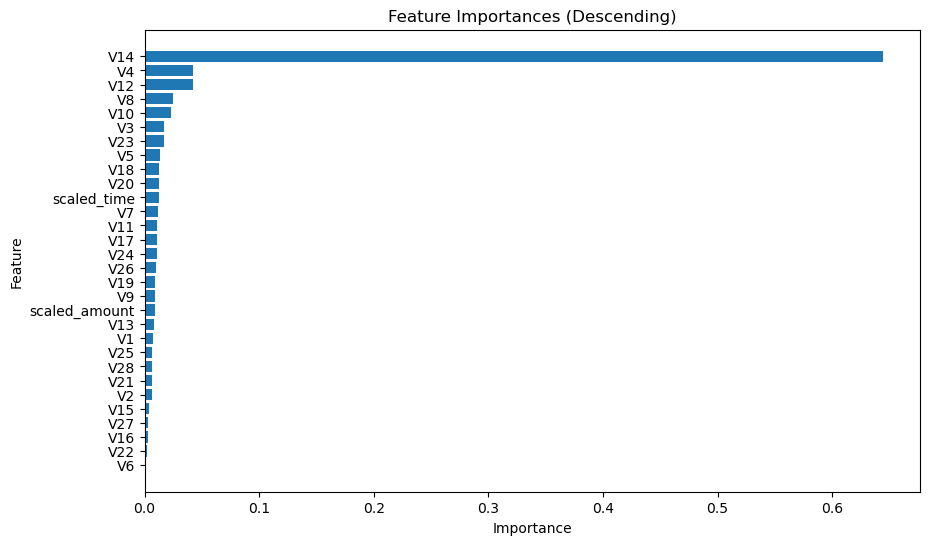

In [14]:
# Train the XGBoost model again if needed
xgb_model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
importances = xgb_model.feature_importances_

# Print or plot the feature importances
for feature, importance in zip(X_train.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

# Optionally, plot the feature importances for a visual aid
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [X_train.columns[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Descending)')
plt.gca().invert_yaxis()
plt.show()


In [15]:
# Select top N important features (adjust N as needed)
N = 20
important_indices = np.argsort(importances)[-N:]

X_train_important = X_train_resampled.iloc[:, important_indices]
X_val_important = X_val.iloc[:, important_indices]

# Train the XGBoost model with the important features
xgb_model_important = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10)
xgb_model_important.fit(X_train_important, y_train_resampled)

# Make predictions
y_pred_important = xgb_model_important.predict(X_val_important)

# Evaluate the model
accuracy_important = accuracy_score(y_val, y_pred_important)
report_important = classification_report(y_val, y_pred_important)

print(f'Accuracy: {accuracy_important}')
print(f'Classification Report:\n{report_important}')


Accuracy: 0.9989830902434772
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34352
           1       0.69      0.85      0.76        66

    accuracy                           1.00     34418
   macro avg       0.85      0.92      0.88     34418
weighted avg       1.00      1.00      1.00     34418



In [16]:
import pickle
# Save the model to a file
with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)

In [17]:
# Later use X_test 
# Load the model from the file
with open('best_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Use the loaded model to make predictions
predictions = loaded_model.predict(X_train)

In [18]:
scaled_test_df = pd.read_csv('../Resources/scaled_test_data.csv')

In [19]:
# Drop the Class for the scaled_test data 
X_test = scaled_test_df.drop('Class', axis=1)
y_test = scaled_test_df['Class']

In [20]:
# Later use X_test 
# Load the model from the file
with open('best_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

In [21]:
ssr = ((predictions - y_test)**2).sum()
ssr

81

In [40]:
# Production with the best model
with open('best_xgb_model.pkl', 'rb') as file:
    loaded_xgb_model = pickle.load(file)
y_pred = loaded_xgb_model.predict(X_test)
accuracy_production_xgb = accuracy_score(y_test, y_pred)
report_production_xgb = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy_production_xgb}')
print(f'Classification Report:\n{report_production_xgb}')


Accuracy: 0.9992813861263163
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112585
           1       0.66      0.79      0.72       132

    accuracy                           1.00    112717
   macro avg       0.83      0.89      0.86    112717
weighted avg       1.00      1.00      1.00    112717

